In [1]:
import pandas as pd
import os
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv('Position_CSV/P_dat.csv')
df.head()

,Unnamed: 0,name,approximate_value,games.x,AVp16,X1,adjusted_yards_per_attempt,assists_on_tackles,completed_passes,extra_points_made,...,total_touchdowns,two_point_conversions,weight,yards_from_scrimmage,yards_from_scrimmage_per_play,yards_recovered_from_fumble,yards_returned_from_interceptions,yards_returned_per_interception,year,X
0,1,Ryan Allen,14,104,2.153846,Career,7.5,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,2,Bryan Anger,19,126,2.412698,Career,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,5.0,5.0,NaN,0.0,NaN,NaN,NaN
2,3,Jason Baker,20,167,1.916168,NaN,1.5,NaN,1.0,NaN,...,NaN,NaN,170.0,-5.0,-5.0,NaN,NaN,NaN,NaN,Career
3,4,Josh Bidwell,21,148,2.270270,NaN,15.0,NaN,1.0,1.0,...,0.0,NaN,NaN,7.0,7.0,NaN,NaN,NaN,NaN,Career
4,5,Corey Bojorquez,2,24,1.333333,Career,NaN,0.0,NaN,NaN,...,NaN,NaN,200.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [3]:
df.drop(['name', 'approximate_value', 'games.x', 'X1', 'height', 'player_id', 'position', 'team_abbreviation', 'season', 'year', 'X'], axis=1, inplace=True)

In [4]:
df.fillna(0, inplace=True)

In [5]:
from sklearn.model_selection import train_test_split

X = np.asarray(df[['adjusted_yards_per_attempt', 'assists_on_tackles', 'completed_passes', 'extra_points_made', 'field_goals_made', 'fumbles_forced', 'fumbles_recovered', 'fumbles_recovered_for_touchdown', 'interceptions', 'interceptions_returned_for_touchdown', 'interceptions_thrown', 'kickoff_return_touchdowns', 'other_touchdowns', 'pass_attempts', 'passes_defended', 'passing_completion', 'passing_touchdowns', 'passing_yards', 'passing_yards_per_attempt', 'plays_from_scrimmage', 'points', 'punt_return_touchdowns', 'quarterback_rating', 'receiving_touchdowns', 'receiving_yards', 'receiving_yards_per_reception', 'receptions', 'rush_attempts', 'rush_touchdowns', 'rush_yards', 'rush_yards_per_attempt', 'rushing_and_receiving_touchdowns', 'sacks', 'safeties', 'solo_tackles', 'tackles_for_loss', 'total_tackles', 'total_touchdowns', 'two_point_conversions', 'yards_from_scrimmage', 'yards_from_scrimmage_per_play', 'yards_recovered_from_fumble', 'yards_returned_from_interceptions', 'yards_returned_per_interception']])
Y = np.asarray(df['AVp16'])
                  

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

Score:  -2.832651274914963
Weights:  [ 6.82895951e-02  3.39939574e-02 -1.59158399e+00 -1.23153579e-02
 -6.00070982e-02 -5.07927034e-15  1.86209811e+00  1.64451786e-15
  4.99600361e-16 -1.38777878e-16 -4.36621966e-03  7.21644966e-16
 -4.44089210e-16  7.60322056e-01 -2.22044605e-16  2.05949165e-02
 -2.63260981e-03  1.93053955e-02 -3.62424906e-03  2.87942892e-02
  1.63552628e-02  0.00000000e+00 -7.60742827e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.87942892e-02
  3.47819859e-02  1.85558165e-02 -4.33398375e-02  3.47819859e-02
  0.00000000e+00  0.00000000e+00 -3.53232227e-02  1.91614919e-01
 -1.32926534e-03  3.47819859e-02  0.00000000e+00  1.85558165e-02
 -4.33398375e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00]


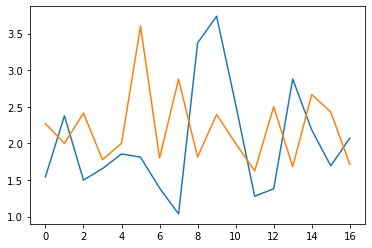

In [6]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X = np.asarray(df[['field_goals_made', 'other_touchdowns', 'extra_points_made']])
Y = np.asarray(df['AVp16'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

Score:  -1.024842014800857
Weights:  [ 0.10408726  0.         -0.04739518]


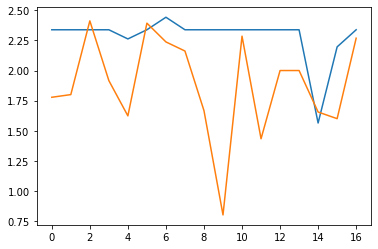

In [8]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

Score:  -1.0419191544871231
Weights:  [ 0.09152066  0.         -0.04406503]


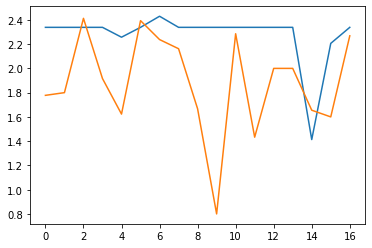

In [9]:
from sklearn import linear_model
reg = linear_model.Ridge (alpha = .5)
reg.fit(X_train, y_train)
print('Score: ', reg.score(X_test, y_test))
print('Weights: ', reg.coef_)

plt.plot(reg.predict(X_test))
plt.plot(y_test)
plt.show()

In [10]:
scores = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = LinearRegression()
    lineReg.fit(X_train, y_train)
    scores.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('Linear Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

scores = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = linear_model.Ridge (alpha = .5)
    lineReg.fit(X_train, y_train)
    scores.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('\nRidge Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

Linear Regression
-8.521994269983725e+28
[ 7.07764384e+11  0.00000000e+00 -7.07764384e+11]

Ridge Regression
-0.7062033442771838
[ 0.09475609  0.         -0.04384522]
